Exploring Polars by visualizing data

I love trying out new tools for processing and analyzing data. #Polars is a new data manipulation whose main pitch as an alternative to #Pandas is its speed and ease of use. For cases when one is processing gigabytes of data in memory is the way to go. The data I will be working on here is far from large. So, why would I prefer pandas to polars. For me its polars' expressive and intuitive syntax. One of the things that made me struggle with pandas is the frequent indexing and re-indexing of a dataframe while transforming data. Many pre-processing functions in pandas look like work-arounds. Polars a cleaner interface which adheres to the #Tidy principle adopting processing data in R. Polars also offers piping of steps out of the box with feels more natural when transforming data. For the data visualization, I went for the seaborn.object interface as it offers a declarative syntax,which is easier for specifying and initializing plot properties, configurations and customizations. My aim here is exploration and skill building. We would not be where we are without pandas and the original sebaorn plotting interface. For package I have decide to adopt `uv` henceforth and `marimo` for notebooks.

In [44]:
import polars as pl
import polars.selectors as cs

In [45]:
gdp = pl.read_excel(source='survey_2024.xlsx',sheet_name='Table 2.1',has_header=False)

In [46]:
colnames_dict = gdp.filter(
    pl.col('column_1') == 'Industry'
).to_dicts()[0]

colnames = list(colnames_dict.values())
colnames


['Industry', 2019, 2020, 2021, '2022+', '2023*']

In [47]:
gdp = (
        gdp.rename(
            {old: str(new) for old, new in zip(gdp.columns,colnames)})
            .drop_nulls()
            .with_row_index()   
            .filter(pl.col('index') > 0)
            .cast({cs.by_name('2022+','2023*'): pl.Int64})
)
gdp

index,Industry,2019,2020,2021,2022+,2023*
u32,str,i64,i64,i64,i64,i64
1,"""Agriculture, forestry and fish…",2135709,2432613,2583190,2837707,3295224
2,"""Growing of crops""",1542584,1786518,1844730,2016699,2330344
3,"""Animal production""",354712,384578,431700,466882,570127
4,"""Support activities to agricult…",24236,25385,27022,26894,27941
5,"""Forestry & logging""",156606,172958,199012,242895,277433
…,…,…,…,…,…,…
37,"""Activities of households as em…",68917,72064,75242,79420,85605
38,"""Financial Intermediation Servi…",-226631,-218639,-244592,-259642,-323771
39,"""All economic activities""",9371398,9862147,11031456,12417686,13891146


In [48]:
top_sectors = (
    gdp.filter(
        pl.col('index').is_in([1,8,13,14,15,23,26])
    )
    .drop('index')
)

In [49]:
top_sectors_long = (
    top_sectors
    .unpivot(index='Industry')
    .rename(
        {   
            'variable': 'year',
            'Industry': 'industry',
            'value': 'gdp_ksh'
        }
    )
    .with_columns(
        gdp_usd = (pl.col('gdp_ksh') * 1 / (129 / 0.001)).round(2)
    )
    .sort('gdp_usd')
)
top_sectors_long

industry,year,gdp_ksh,gdp_usd
str,str,i64,f64
"""Construction""","""2019""",630653,4.89
"""Financial and insurance activi…","""2019""",667702,5.18
"""Financial and insurance activi…","""2020""",723059,5.61
"""Construction""","""2020""",750153,5.82
"""Manufacturing""","""2019""",809253,6.27
…,…,…,…
"""Agriculture, forestry and fish…","""2019""",2135709,16.56
"""Agriculture, forestry and fish…","""2020""",2432613,18.86
"""Agriculture, forestry and fish…","""2021""",2583190,20.02


In [51]:
import seaborn.objects as so

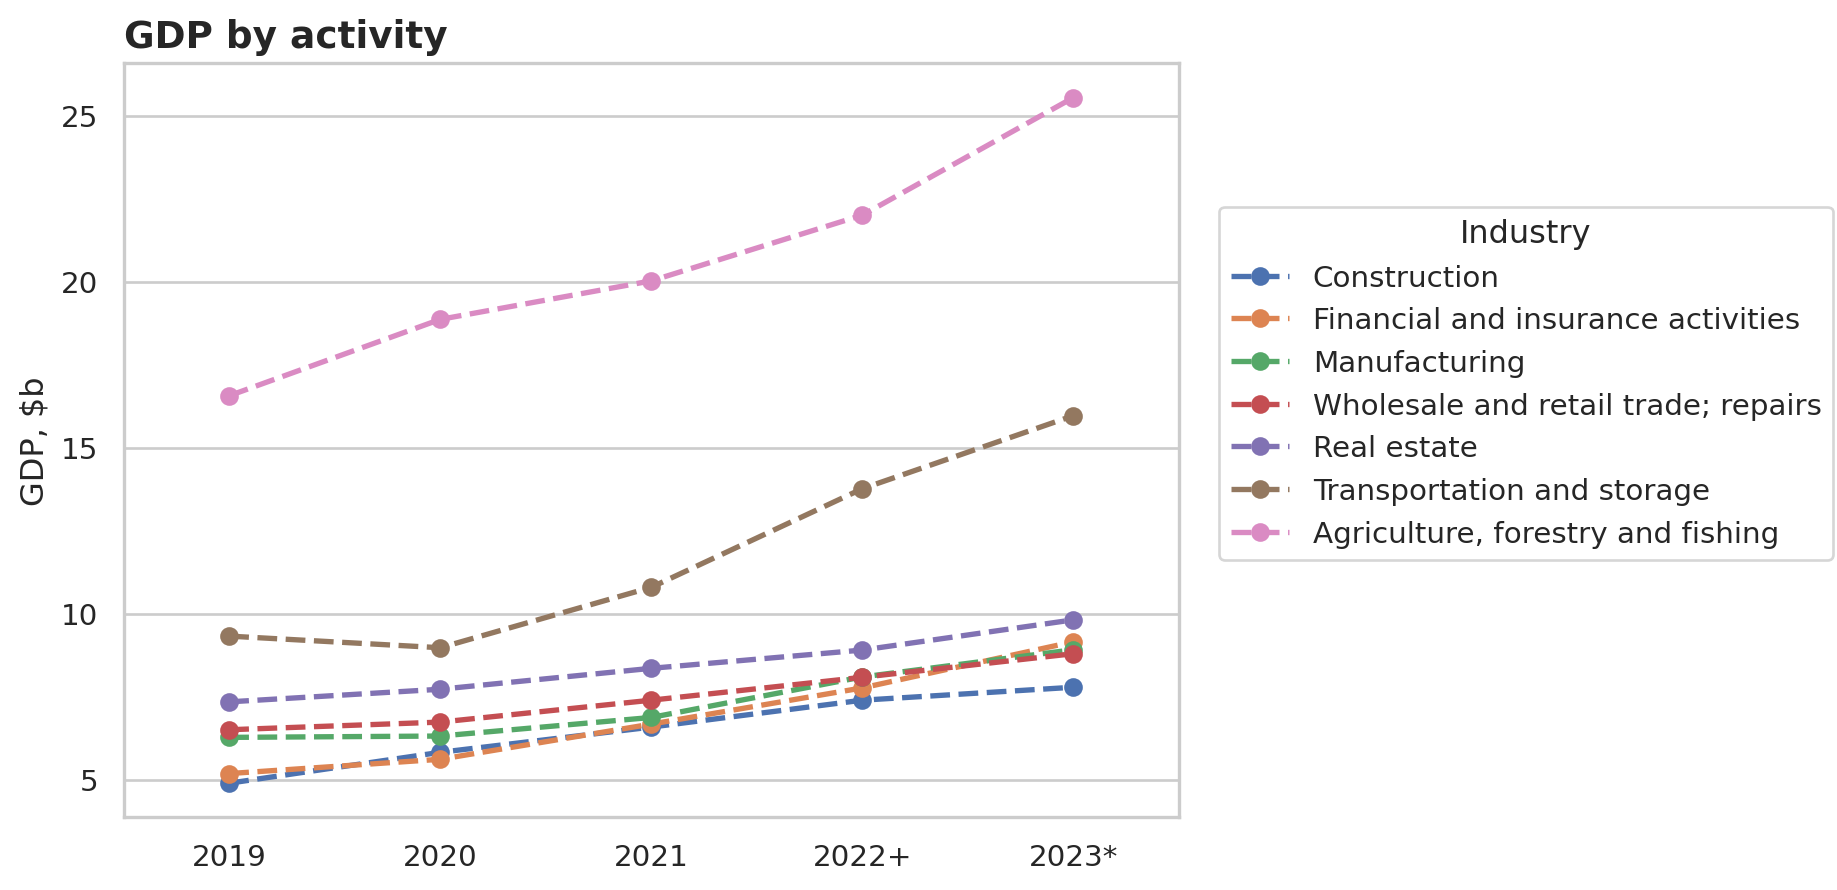

In [136]:
from seaborn import axes_style

custom_theme = {**axes_style('whitegrid'),
                'axes.titleweight': 'bold',
                'axes.titlesize':14,
                'axes.titlelocation':'left'}
(
    so.Plot(top_sectors_long,'year','gdp_usd',color='industry')
    .add(so.Line(marker='o',linewidth=2,linestyle='--'))
    .label(
        x='',
        y='GDP, $b',
        title='GDP by activity',
        color=str.capitalize,
        title_fontsize=16)
    .theme(custom_theme)
)

In [29]:
gdp_gni = pl.read_excel('survey_2024.xlsx',sheet_name='Table 2.13',has_header=False)

In [30]:
colnames_gdp_gni = (
    gdp_gni.with_row_index()
    .filter(pl.col('index') ==2)
    .drop('index')
    .to_dicts()[0]
    )

colnames_gdp_gni = [str(colname).replace('.0','') for _,colname in colnames_gdp_gni.items()]
colnames_gdp_gni[0] = 'gdp_var'

In [31]:
gdp_income = (
    gdp_gni.rename({
        old_name: new_name for old_name,new_name in zip(gdp_gni.columns,colnames_gdp_gni)
        })
        .drop_nulls()
        .with_row_index(offset=1)
        .filter(
            pl.col('index').is_in([5,8,11])
        )
        .cast({cs.exclude('gdp_var'): pl.Int64})
)

In [146]:
gdp_income

index,gdp_var,2019,2020+,2021+,2022+,2023*
i64,str,i64,i64,i64,i64,i64
5,"""Gross Domestic Product At Mark…",10237727,10715070,12027662,13489642,15108806
8,"""Gross National Income At Marke…",10074051,10643131,11860024,13282228,14844951
11,"""Gross National Disposable Inco…",10612934,11170239,12530847,14050988,15822547


In [148]:
gdp_income_long = (
    gdp_income
    .drop('index')
    .unpivot(index='gdp_var',variable_name='year',value_name='value_ksh')
    .with_columns(
        value_usd = (pl.col('value_ksh') * 1 / (129 / .001)).round(2)
    )
)
gdp_income_long

gdp_var,year,value_ksh,value_usd
str,str,i64,f64
"""Gross Domestic Product At Mark…","""2019""",10237727,79.36
"""Gross National Income At Marke…","""2019""",10074051,78.09
"""Gross National Disposable Inco…","""2019""",10612934,82.27
"""Gross Domestic Product At Mark…","""2020+""",10715070,83.06
"""Gross National Income At Marke…","""2020+""",10643131,82.5
…,…,…,…
"""Gross National Income At Marke…","""2022+""",13282228,102.96
"""Gross National Disposable Inco…","""2022+""",14050988,108.92
"""Gross Domestic Product At Mark…","""2023*""",15108806,117.12


In [170]:
year = gdp_income_long.select(pl.col('year')).unique().to_series()
gdp_column = gdp_income_long.filter(pl.col('gdp_var') =='Gross Domestic Product At Market Prices').select(pl.col('value_usd')).to_series()
income_column = gdp_income_long.filter(pl.col('gdp_var') == 'Gross National Disposable Income').select(pl.col('value_usd')).to_series()
disposable_income_column = gdp_income_long.filter(pl.col('gdp_var') == 'Gross National Income At Market Prices').select(pl.col('value_usd')).to_series()


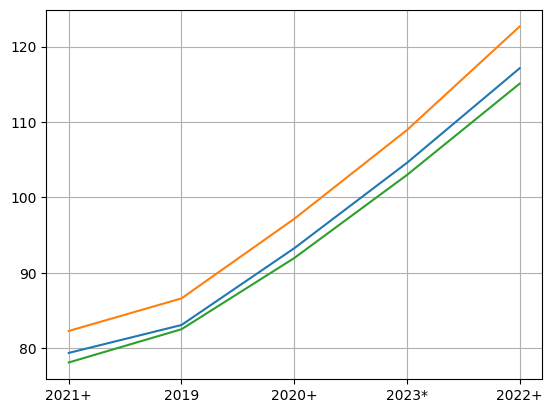

In [171]:
plt.plot(year,gdp_column)
plt.plot(year,income_column)
plt.plot(year,disposable_income_column)

plt.grid()

In [34]:
employment = pl.read_excel('employment_19_23.xlsx',sheet_name='Table 3.1',has_header=False)
employment

column_1,column_2,column_3,column_4,column_5,column_6
str,f64,f64,f64,f64,str
"""Table 3.1: Total Recorded Empl…",null,null,null,null,null
null,null,null,null,null,""" '000"""
null,2019.0,2020.0,2021.0,2022.0,"""2023*"""
"""Modern Establishments""",null,null,null,null,null
""" Wage Employees .. .. …",2928.4,2742.6,2906.1,3015.7,"""3138.5"""
…,…,…,…,…,…
"""Informal Sector2 .. .. .. …",15051.6,14508.0,15261.8,15964.7,"""16287.4"""
"""TOTAL .. .. ..…",18142.7,17406.7,18331.6,19148.2,"""19598.2"""
"""* Provisional""",null,null,null,null,null


In [35]:
employment_cols_dict = (
    employment
    .with_row_index()
    .filter(pl.col('index') == 2)
    .drop('index')
    .to_dicts()[0]
)

employment_cols = list(employment_cols_dict.values())
employment_cols[0] = 'sector'
employment_cols

['sector', 2019.0, 2020.0, 2021.0, 2022.0, '2023*']

In [36]:
employment_long = (
    employment
    .rename(
        {old:str(new) for old, new in zip(employment.columns,employment_cols)}
    )
    .drop_nulls()
    .with_row_index()
    .filter(
        pl.col('index') > 1
    )
    .with_columns(
        pl.Series(['Formal','Informal','Total']).alias('sector'),
        pl.col('2023*').cast(pl.Float64)
    )
    .drop('index')
    .unpivot(index='sector',variable_name='year',value_name='employment')
    .with_columns(
        pl.col('year').str.replace('.0','',literal=True),
        employment = pl.col('employment') / 1e3
    )
)

employment_long

sector,year,employment
str,str,f64
"""Formal""","""2019""",3.0911
"""Informal""","""2019""",15.0516
"""Total""","""2019""",18.1427
"""Formal""","""2020""",2.8987
"""Informal""","""2020""",14.508
…,…,…
"""Informal""","""2022""",15.9647
"""Total""","""2022""",19.1482
"""Formal""","""2023*""",3.3109


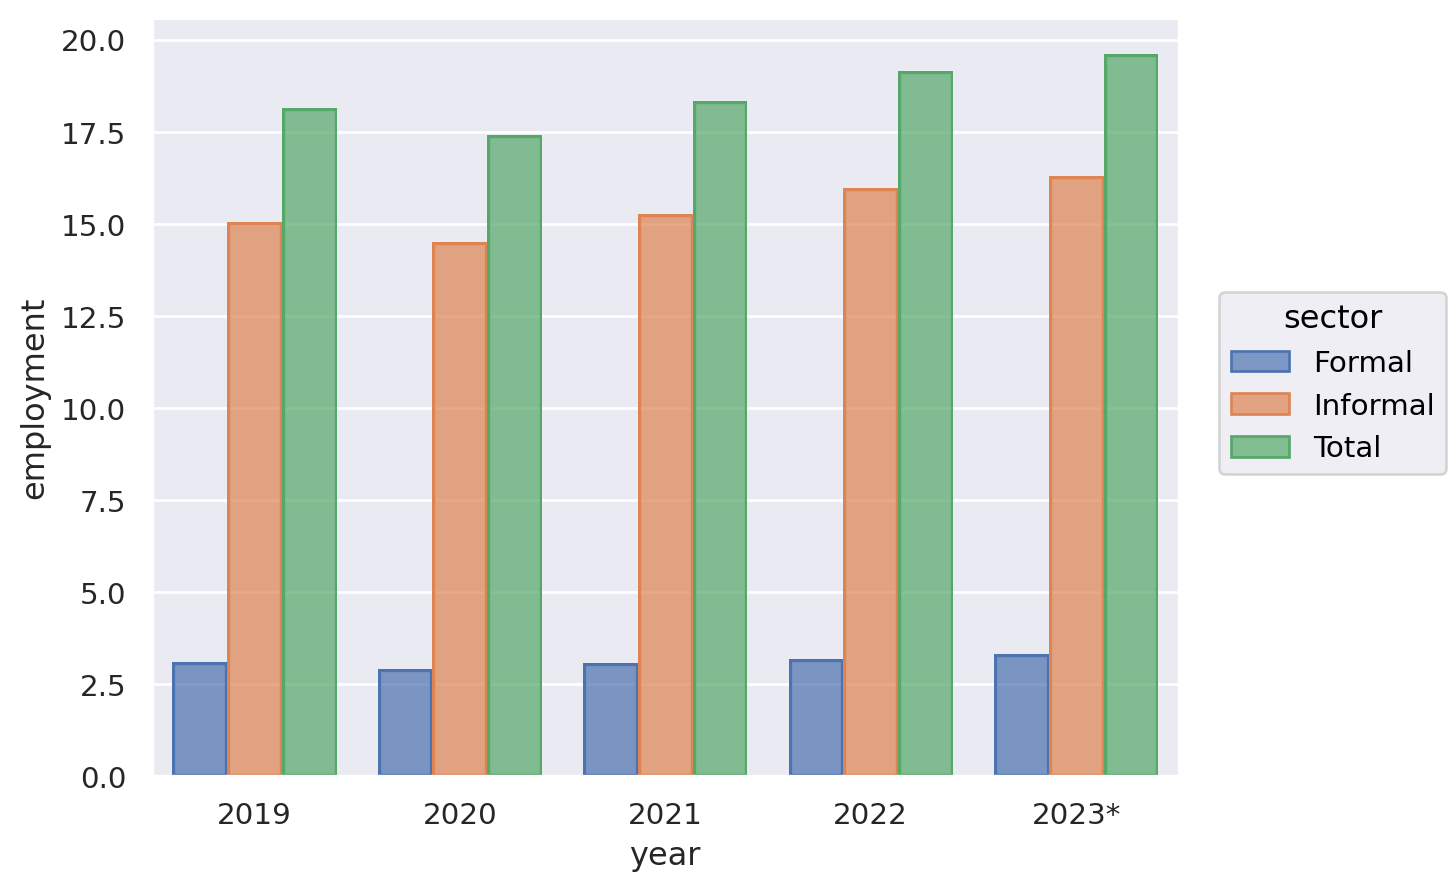

In [64]:
(
    so.Plot(employment_long,'year','employment',color='sector')
    .add(so.Bar(),so.Dodge())
)